In [71]:
# import the packages
import os
import pickle
import pylab
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers


In [72]:
# to run with GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


2 Physical GPUs, 2 Logical GPUs


In [73]:
# get number of images
import pathlib

data_dir = pathlib.Path("image")

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


1000


In [74]:
# gets number of classes
num_of_class = len(next(os.walk(os.path.abspath('')+'\\image'))[1])
print(num_of_class)

10


In [75]:
batch_size = 32
img_height = 299
img_width = 299

In [76]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1000 files belonging to 10 classes.
Using 800 files for training.
Found 1000 files belonging to 10 classes.
Using 200 files for validation.


In [77]:
# uses the folder names as the class names
class_names = train_ds.class_names
print(class_names)

['fabric', 'foliage', 'glass', 'leather', 'metal', 'paper', 'plastic', 'stone', 'water', 'wood']


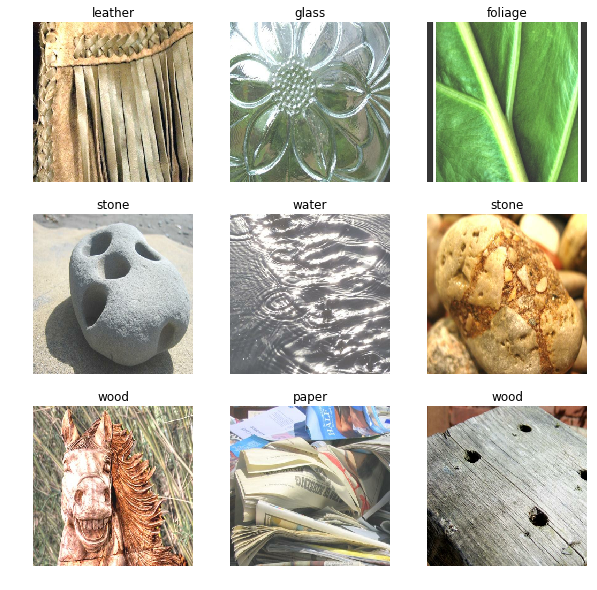

In [78]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [90]:
def make_model(num_channels):
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(num_channels, 9, activation='relu', input_shape=(None, None, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, use_bias=True, input_shape=(300,))) 
    return model

In [89]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

num_channels = 50

epochs = 1000  # Fixed
learning_rate = 0.001
optimizer_ = 'SGD'  # Question 3
use_dropout = False  # Question 3(d) (see make_model)

model = make_model(num_channels)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

    
# Training
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(
train_ds,
epochs=epochs,
validation_data=val_ds)




ValueError: The last dimension of the inputs to `Dense` should be defined. Found `None`.

In [ ]:
# Save the plot for losses
train_loss = history.history['loss']
val_loss = history.history["val_loss"]
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.close()

In [ ]:
# Save the plot for accuracies
train_acc = history.history["accuracy"]
test_acc = history.history["val_accuracy"]
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.close()